# Web Scrapping - Naukri.com

In [2]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

In [3]:
url_base = 'https://www.naukri.com/jobs-in-india?functionAreaIdGid=3&functionAreaIdGid=4&functionAreaIdGid=5&functionAreaIdGid=8&clusters=functionalAreaGid'

In [4]:
page = requests.get(url_base)
page.text

'<!DOCTYPE html> <html lang="en"> <head> <meta http-equiv="X-UA-Compatible" content="IE=Edge" /> <meta name="viewport" content="width=device-width,initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" /> <link rel="dns-prefetch preconnect" href="//static.naukimg.com"> <link rel="dns-prefetch preconnect" href="//img.naukimg.com"> <link rel="dns-prefetch preconnect" href="//logs.naukri.com"> <link rel="dns-prefetch preconnect" href="//lg.naukri.com"> <link rel="dns-prefetch" href="https://www.googletagmanager.com" /> <base href="//www.naukri.com" /> <link rel="manifest" href="./manifest.json"> <link rel="preload" as="style" href="//static.naukimg.com/s/7/109/c/main.94577272.min.css"/> <link crossorigin="anonymous" rel="preload" as="script" href="//static.naukimg.com/s/7/109/j/main.992b285f.min.js"> <link rel="preload" as="script" href="https://static.naukimg.com/s/7/0/j/widget-client-ni.min.js" /> <link rel="preload" as="script" href="https://static.naukimg.com/s/7/0

C:\Users\SIYAVUDEEN\AppData\Local\Temp\ipykernel_25488\987324148.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:\chromedriver_win32')


<html lang="en">
 <head>
  <title>
   Jobs In India - 21430 Job Vacancies In India - Naukri.com
  </title>
  <meta content="Apply To 21430 Job Openings In India On Naukri.com, India's #1 Job Portal. Explore Jobs In India Across Top Companies Now!" name="description"/>
  <link href="android-app://naukriApp.appModules.login/https/www.naukri.com/jobs-in-india" rel="alternate"/>
  <link href="https://www.naukri.com/jobs-in-india" rel="canonical"/>
  <meta content="jobsearch" name="atdlayout"/>
  <meta content="ALL" name="robots"/>
  <meta content="Jobs &amp; Career: Job Search, Apply Jobs, Post Jobs" name="classification"/>
  <meta content="no-cache" name="pragma"/>
  <meta content="general" name="rating"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="GLOBAL" name="distribution"/>
  <meta content="document" name="resource-type"/>
  <meta content="www.naukri.com" name="author"/>
  <meta content="EN" name="content-language"/>
  <meta content="171330469593307" property="fb:
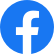
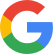

In [5]:
driver = webdriver.Chrome('D:\chromedriver_win32')
driver.get(url_base)

time.sleep(3)

soup = BeautifulSoup(driver.page_source,'html5lib')

print(soup.prettify())

driver.close()

In [6]:
results = soup.find(class_='list')
results

<div class="list"><article class="jobTuple" data-job-id="270423003741"><div class="jobTupleHeader"><div class="info fleft"><a class="title ellipsis" href="https://www.naukri.com/job-listings-urgent-hiring-with-tech-mahindra-bmc-patrol-developer-tech-mahindra-kolkata-hyderabad-secunderabad-pune-ahmedabad-chennai-bangalore-bengaluru-delhi-ncr-mumbai-all-areas-5-to-10-years-270423003741" target="_blank" title="Urgent Hiring with Tech Mahindra- BMC Patrol Developer">Urgent Hiring with Tech Mahindra- BMC Patrol Developer</a><div class="companyInfo subheading"><a class="subTitle ellipsis fleft" href="https://www.naukri.com/tech-mahindra-jobs-careers-1066" target="_blank" title="Tech Mahindra">Tech Mahindra</a><span class="starRating fleft" title="Powered by Ambition Box"><i class="naukicon naukicon-rating-yellow-star fright"></i>3.7</span><a class="reviewsCount fleft" href="https://www.ambitionbox.com/reviews/tech-mahindra-reviews?utm_campaign=srp_ratings&amp;utm_medium=desktop&amp;utm_sourc

In [7]:
job_elems = results.find_all('article',class_='jobTuple')

In [8]:
df = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Location','URL'])

In [ ]:
#url_base = f'https://www.naukri.com/it-jobs-{page_num}?src=gnbjobs_homepage_srch'
driver = webdriver.Chrome('D:\chromedriver_win32')

for page_num in tqdm(range(500, 850)):
    url_base = f'https://www.naukri.com/salary-mentioned-jobs-in-india-{page_num}?k=salary%20mentioned%20jobs&l=india&nignbevent_src=jobsearchDeskGNB'
    #url = url_base + str(page_num)
    driver.get(url_base)
    time.sleep(10)
    soup = BeautifulSoup(driver.page_source,'html5lib')
    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple')
    
    for job_elem in job_elems:
        
        # URL to apply for the job     
        URL = job_elem.find('a',class_='title ellipsis').get('href')
        #print(URL.strip())

        # Post Title
        Title = job_elem.find('a',class_='title ellipsis')
        #print(Title.text)

        # Company Name
        Company = job_elem.find('a',class_='subTitle ellipsis fleft')
        #print(Company.text)

        # Ratings
        rating_span = job_elem.find('span',class_='starRating fleft')
        if rating_span is None:
            continue
        else:
            Ratings = rating_span.text
        #print(Ratings)

        # Reviews Counts
        Review_span = job_elem.find('a',class_='reviewsCount fleft')
        if Review_span is None:
            continue
        else:
            Reviews = Review_span.text
        #print(Reviews)

        # Years of experience Required
        Exp = job_elem.find('li',class_='fleft br2 placeHolderLi experience')
        Exp_span = Exp.find('span',class_='ellipsis fleft expwdth')
        if Exp_span is None:
            continue
        else:
            Experience = Exp_span.text
        #print(Experience)   

        # Salary offered for the job
        Sal = job_elem.find('li',class_='fleft br2 placeHolderLi salary')
        Sal_span = Sal.find('span',class_='ellipsis fleft')
        if Sal_span is None:
            continue
        else:
            Salary = Sal_span.text
        #print(Salary)  

        # Location for the job post
        Loc = job_elem.find('li',class_='fleft br2 placeHolderLi location')
        Loc_exp = Loc.find('span',class_='ellipsis fleft locWdth')
        if Loc_exp is None:
            continue
        else:
            Location = Loc_exp.text
        #print(Location)
        
        
        df=df.append({'URL':URL,'Title':Title.text,'Company':Company.text,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location},ignore_index = True)

driver.close()

In [64]:
df

,Title,Company,Ratings,Reviews,Experience,Salary,Location,URL
0,Teamcenter Developer,Trigent Software,3.7,309 Reviews,2-7 Yrs,6-16 Lacs PA,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",https://www.naukri.com/job-listings-teamcenter...
1,Teamcenter Developer,Trigent Software,3.7,309 Reviews,2-7 Yrs,5.5-15.5 Lacs PA,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",https://www.naukri.com/job-listings-teamcenter...
2,Servicenow Developer,Trigent Software,3.7,309 Reviews,5-10 Yrs,4.75-9.75 Lacs PA,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",https://www.naukri.com/job-listings-servicenow...
3,Cloud Architect,Oracle,4.0,3384 Reviews,5-10 Yrs,Not disclosed,"Hybrid - Noida, Kolkata, Mumbai, Hyderabad/Sec...",https://www.naukri.com/job-listings-cloud-arch...
4,Oracle Database Administrator,Oracle,4.0,3384 Reviews,5-10 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",https://www.naukri.com/job-listings-oracle-dat...
...,...,...,...,...,...,...,...,...
8388,Senior Recruiter - Non IT,RDP Workstations,3.8,48 Reviews,5-8 Yrs,4-8 Lacs PA,Hyderabad/Secunderabad,https://www.naukri.com/job-listings-senior-rec...
8389,Manager - Compensation & Benefit,BC Management Services,3.8,16 Reviews,8-13 Yrs,Not disclosed,"Hybrid - Noida, Ghaziabad, New Delhi, Faridaba...",https://www.naukri.com/job-listings-manager-co...
8390,30K Salary || Inbound Process Hiring || Custom...,Ienergizer,4.2,4979 Reviews,0-2 Yrs,2.5-3.5 Lacs PA,"Noida, Ghaziabad, Greater Noida, Delhi / NCR",https://www.naukri.com/job-listings-30k-salary...
8391,30K Salary || Blended Process Hiring || Custom...,Ienergizer,4.2,4979 Reviews,0-4 Yrs,3-3.5 Lacs PA,"Noida, Delhi / NCR",https://www.naukri.com/job-listings-30k-salary...


In [68]:
# saving the dataframe
df.to_csv('N3.csv')